In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dct_transform(f):
    """
    @brief Computes the Discrete Cosine Transform (DCT) of a given signal.

    The function calculates the DCT coefficients for a discrete signal
    using the type-II DCT formula. It is commonly used in signal processing
    and data compression tasks.

    @param f A list or numpy array representing the input discrete signal.
             It contains the signal values sampled at regular intervals.

    @return A numpy array containing the DCT coefficients for the input signal.
    """

    L = len(f)
    a_k = np.zeros(L)  # Array to store DCT coefficients
    for k in range(L):
        # Definition of λ_k
        if k == 0:
            lambda_k = 1 / np.sqrt(2)
        else:
            lambda_k = 1
        # Compute the coefficient a_k
        for n in range(L):
            a_k[k] += lambda_k * np.sqrt(2 / L) * f[n] * np.cos((np.pi * k / L) * (n + 0.5))
    return a_k

# Example usage:
f = [1, 2, 3, 4]  # Example of a discrete signal
coefficients = dct_transform(f)
print("DCT coefficients:", coefficients)

DCT coefficients: [ 5.00000000e+00 -2.23044250e+00 -8.88178420e-16 -1.58512668e-01]


In [ ]:
import numpy as np

def DCT(f):
    """
    Computes the 2D Discrete Cosine Transform (DCT) of a given input matrix.

    The function calculates the DCT coefficients for a 2D input signal `f` using the type-II DCT formula.
    This transform is widely used in image and signal processing, particularly for compression.

    Args:
        f (numpy.ndarray): A 2D numpy array representing the input signal or image.

    Returns:
        numpy.ndarray: A 2D numpy array of the same shape as `f` containing the DCT coefficients.
    """
    ak = np.zeros_like(f)
    L = len(f)

    for k1 in range(L):
        lambda_k1 = 1 / np.sqrt(2) if k1 == 0 else 1
        for k2 in range(L):
            lambda_k2 = 1 / np.sqrt(2) if k2 == 0 else 1
            for n1 in range(L):
                for n2 in range(L):
                    ak[k1, k2] += (lambda_k1 * lambda_k2 * 2 / L *
                                   f[n1, n2] *
                                   np.cos((np.pi * k1 / L) * (n1 + 0.5)) *
                                   np.cos((np.pi * k2 / L) * (n2 + 0.5)))
    return ak


In [ ]:
import numpy as np

def quan_matrix(q, block_size):
    """
    Generates a quantization matrix for a given quantization parameter and block size.

    Args:
        q (float): The quantization parameter that controls the scaling of the matrix.
                   A higher value increases the quantization level.
        block_size (int): The size of the quantization matrix (e.g., 8 for an 8x8 block).

    Returns:
        numpy.ndarray: A 2D numpy array of shape `(block_size, block_size)`
                       representing the quantization matrix.
    """
    Q = np.zeros((block_size, block_size))
    for i in range(block_size):
        for j in range(block_size):
            Q[i, j] = 1 + q * (1 + i + j)
    return Q


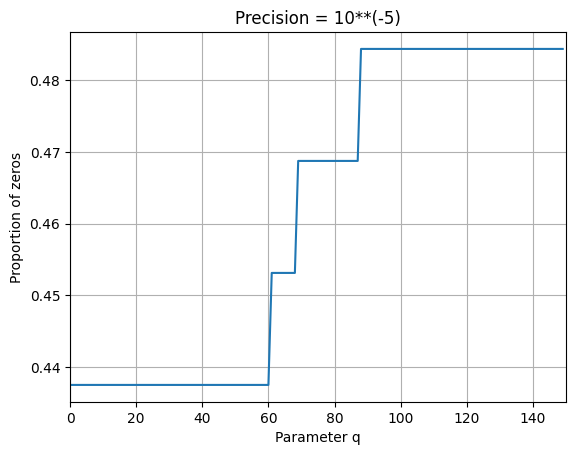

In [ ]:
# Processing of image
image = plt.imread('cameraman.png')  # Load the image
image_array = np.array(image)  # Convert the image to a NumPy array

# Block size
block_size = 8

# Create a list to store all the blocks
blocks = []

# Split the image into 8x8 blocks
for i in range(0, 256, block_size):
    for j in range(0, 256, block_size):
        block = image_array[i:i + block_size, j:j + block_size]
        blocks.append(block)

blocks_array = np.array(blocks)

# Performing the DCT on each block
blocks_array_DCT = np.zeros(np.shape(blocks_array))
for i in range(blocks_array.shape[0]):
    blocks_array_DCT[i] = DCT(blocks_array[i])

# Define the maximum range of the quantization parameter q
ax_len = 150
proportion_of_zeros = np.zeros(ax_len)

# Define the precision threshold below which values are considered zero
precision = 10**(-5)

blocks_array_DCT_quan = np.zeros(np.shape(blocks_array))

# Loop through different quantization levels (q values)
for q in range(0, ax_len):
    # Generate the quantization matrix for the current q value
    Q = quan_matrix(q, block_size)

    for i in range(blocks_array_DCT.shape[0]):
        # Quantize the DCT coefficients by dividing by the quantization matrix Q
        blocks_array_DCT_quan[i] = blocks_array_DCT[i] / Q

    # Calculate the proportion of coefficients that are effectively zero (less than precision)
    proportion_of_zeros[q] = np.sum(blocks_array_DCT_quan[i] < precision) / (block_size**2)

plt.plot(range(0, ax_len), proportion_of_zeros)
plt.title("Precision = 10**(-5)")
plt.xlim(0, ax_len)
plt.xlabel("Parameter q")
plt.ylabel("Proportion of zeros")
plt.grid()
plt.show()